1.EDA (рассчитать описательные статистики (мю,сигма,квартили…)+ графический анализ с выводами)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset_path = 'lego_sets.csv'

In [4]:
df = pd.read_csv(dataset_path, encoding='utf-8')

### датасет по конструкторам лего

In [5]:
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  float64
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


### удаляем описательные данные

In [7]:
df_1 = df.drop(['prod_desc', 'prod_id', 'prod_long_desc', 'set_name', 'theme_name', ], axis = 1)

In [8]:
df_1.describe()

,list_price,num_reviews,piece_count,play_star_rating,star_rating,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,10641.000000,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,4.514134,4.228960
std,91.980429,36.368984,825.364580,0.652051,0.518865,0.660282
min,2.272400,1.000000,1.000000,1.000000,1.800000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,4.300000,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.700000,4.300000
75%,70.192200,13.000000,544.000000,4.800000,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000


### найдем категориальные перемннные и заменим их на числовые значения

In [9]:
feature_names = df_1.select_dtypes(include='object').columns.tolist()
feature_names

['ages', 'review_difficulty', 'country']

In [10]:
df_1['review_difficulty'].value_counts()

Easy                4236
Average             3765
Very Easy           1139
Challenging         1058
Very Challenging       8
Name: review_difficulty, dtype: int64

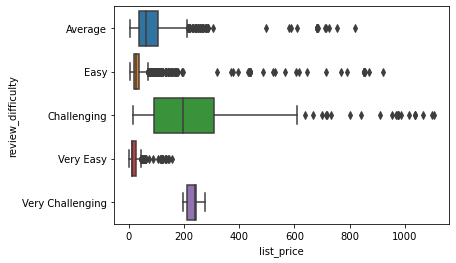

In [11]:
sns.boxplot('list_price', 'review_difficulty', data=df_1);

In [12]:
df_1['ages'].value_counts()

6-12     1476
7-14     1421
8-14     1180
4-7       957
5-12      911
10+       870
2-5       840
7-12      723
9-14      624
16+       420
8-12      350
4-99      311
12+       298
6-14      233
8+        226
1½-3      213
14+       212
10-21     184
6+        148
10-16     148
1½-5      113
9-16       92
5+         71
11-16      66
9-12       46
12-16      42
5-8        21
10-14      21
9+         21
4+         21
7+          2
Name: ages, dtype: int64

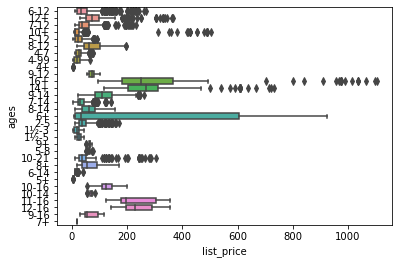

In [13]:
sns.boxplot('list_price', 'ages', data=df_1);

In [14]:
df_1['country'].value_counts()

US    817
CA    815
GB    576
NL    576
DN    575
AT    575
AU    570
IE    569
FR    568
CH    568
BE    566
NZ    565
IT    550
LU    549
CZ    549
NO    549
FI    549
DE    549
ES    549
PT    547
PL    530
Name: country, dtype: int64

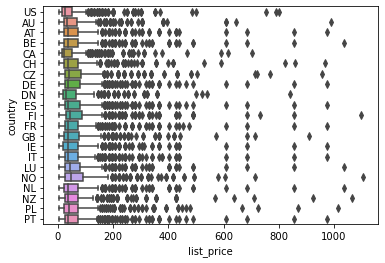

In [15]:
sns.boxplot('list_price', 'country', data=df_1);

In [16]:
feature_bin_names = ['ages', 'review_difficulty', 'country']

train_df[feature_bin_names] = train_df[feature_bin_names].replace({'A':0, 'B':1})
test_df[feature_bin_names] = test_df[feature_bin_names].replace({'A':0, 'B':1})

train_df.info()

NameError: name 'train_df' is not defined

In [ ]:
df_1['review_difficulty'] = df_1['review_difficulty'].replace({'Easy':1, 'Average':2, 'Very Easy':3, 'Challenging':4, 'Very Challenging ':4})
df_1.info()

In [ ]:
df_1['review_difficulty'].value_counts()

In [ ]:
df_1['review_difficulty'] = df_1['review_difficulty'].replace({'Very Challenging':4})

In [17]:
df_1['review_difficulty'].value_counts()

Easy                4236
Average             3765
Very Easy           1139
Challenging         1058
Very Challenging       8
Name: review_difficulty, dtype: int64

In [18]:
df_1 = df_1.drop(['ages'], axis = 1)

In [19]:
df_1['country'] = df_1['country'].replace({
'US': 1,
'CA': 2,
'GB': 3,
'NL': 4,
'AT': 5,
'DN': 6,
'AU': 7,
'IE': 8,
'FR': 9,
'CH': 10,
'BE': 11,
'NZ': 12,
'IT': 13,
'DE': 14,
'ES': 15,
'LU': 16,
'FI': 17,
'NO': 18,
'CZ': 19,
'PT': 20,
'PL': 21
})

средние значения + квартили:

In [20]:
df_1.describe()

,list_price,num_reviews,piece_count,play_star_rating,star_rating,val_star_rating,country
count,12261.000000,10641.000000,12261.000000,10486.000000,10641.000000,10466.000000,12261.000000
mean,65.141998,16.826238,493.405921,4.337641,4.514134,4.228960,10.497920
std,91.980429,36.368984,825.364580,0.652051,0.518865,0.660282,6.199453
min,2.272400,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,4.300000,4.000000,5.000000
50%,36.587800,6.000000,216.000000,4.500000,4.700000,4.300000,10.000000
75%,70.192200,13.000000,544.000000,4.800000,5.000000,4.700000,16.000000
max,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000,21.000000


средние значения + квартили формулами:

In [23]:
mean_price = df_1['list_price'].sum() / df_1['list_price'].count()
mean_price

65.14199840959138

In [24]:
mean_piece_count = df_1['piece_count'].sum() / df_1['piece_count'].count()
mean_piece_count

493.40592121360413

In [25]:
mean_star_rating = df_1['star_rating'].sum() / df_1['star_rating'].count()
mean_star_rating

4.514134009961469

найдем среднеквадратичное отклонение цены и количества деталей:

In [26]:
price_std = np.sqrt(((df_1['list_price'] - df_1['list_price'].mean())**2).sum() / df_1['list_price'].count())
price_std

91.97667829438977

In [27]:
piece_count_std = np.sqrt(((df_1['piece_count'] - df_1['piece_count'].mean())**2).sum() / df_1['piece_count'].count())
piece_count_std

825.3309215986135

несмещенная дисперсия:

In [28]:
df_1['piece_count'].var(ddof=1)

681226.6905978862

In [29]:
df_1['list_price'].var(ddof=1)

8460.399375302304

представим данные графически

In [33]:
feature_num_names = df_1.drop('country', axis=1).select_dtypes(include=['float64', 'int64']).\
        columns.tolist()
feature_num_names

['list_price',
 'num_reviews',
 'piece_count',
 'play_star_rating',
 'star_rating',
 'val_star_rating']

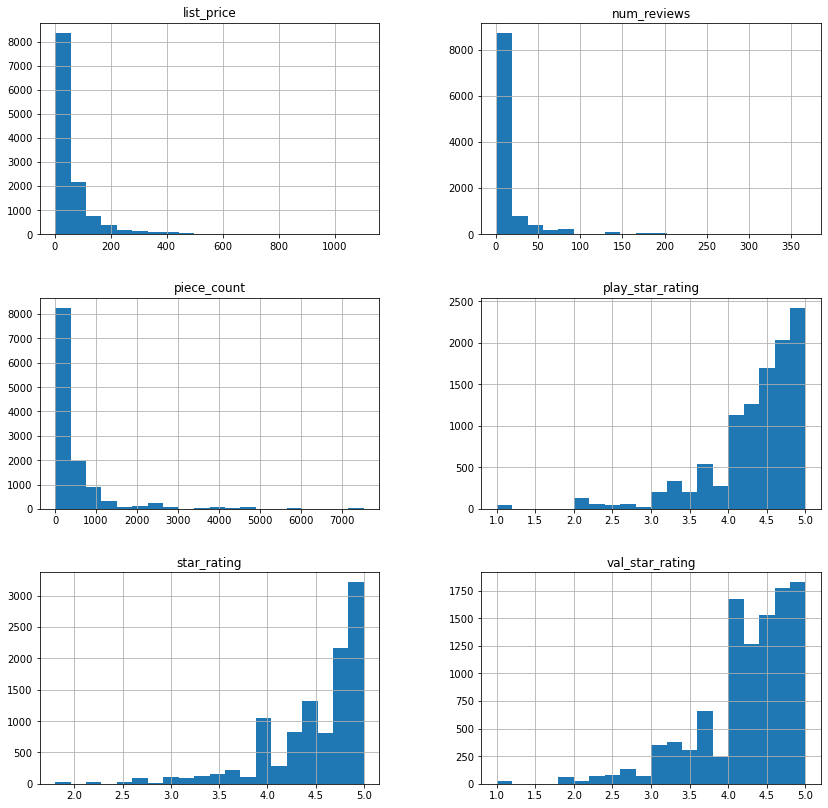

In [34]:
df_1[feature_num_names].hist(figsize=(14,14), bins=20, grid=True);